In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


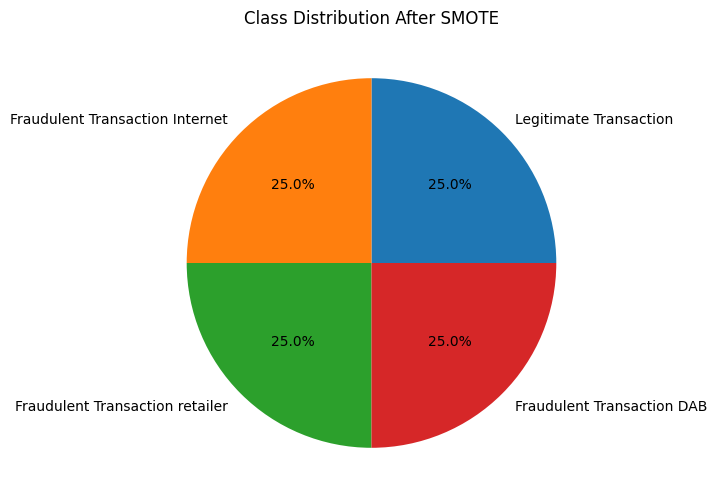

Decision Tree Accuracy: 0.9946562680531484
XGBoost Accuracy: 0.9992778740612362
Decision Tree Cross-Validation Accuracy: 0.9968512138099435
XGBoost Cross-Validation Accuracy: 0.9991044720446827


In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/professional_training_beginner folder/module12/sampled_transactions.csv')

# Function to balance the dataset using SMOTE
def balance_data_with_smote(df, target_column):
    X = df.drop([target_column] + [col for col in df.columns if 'Unnamed' in col], axis=1)
    y = df[target_column]
    smote = SMOTE(random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X.select_dtypes(include=[int, float]), y)
    balanced_df = pd.DataFrame(X_resampled, columns=X.select_dtypes(include=[int, float]).columns)
    balanced_df[target_column] = y_resampled
    return balanced_df

# Balance the dataset
balanced_df = balance_data_with_smote(df, 'TX_FRAUD_SCENARIO')

# Function to plot data imbalance
def plot_data_imbalance(data_frame, target_column):
    plt.figure(figsize=(8, 6))
    data_frame[target_column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Class Distribution After SMOTE')
    plt.ylabel('')
    plt.show()

# Display the class distribution
plot_data_imbalance(balanced_df, 'TX_FRAUD_SCENARIO')

# Prepare data for model training
X = balanced_df.drop('TX_FRAUD_SCENARIO', axis=1)
y = balanced_df['TX_FRAUD_SCENARIO']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_predictions))

# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, xgb_predictions))

# Cross-validation for more robust evaluation
dt_cv_scores = cross_val_score(dt_classifier, X, y_encoded, cv=5)
xgb_cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=5)
print('Decision Tree Cross-Validation Accuracy:', dt_cv_scores.mean())
print('XGBoost Cross-Validation Accuracy:', xgb_cv_scores.mean())
